In [8]:
#main libraries
import tensorflow as tf
from tensorflow import keras

#helper libraries
import random as rn
import numpy as np
import matplotlib.pyplot as plt

In [9]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [10]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

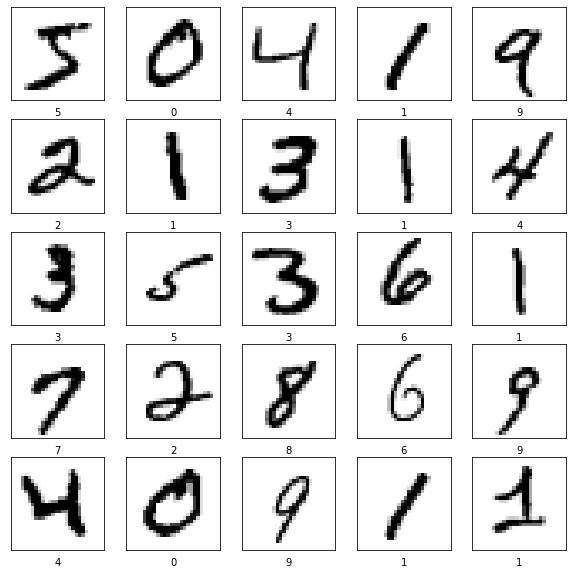

In [11]:
import matplotlib.pyplot as plt
#matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 41s 691us/sample - loss: 2.2657 - acc: 0.8430
Epoch 2/5
60000/60000 [==============================] - 42s 708us/sample - loss: 0.3853 - acc: 0.9065 - loss: 0.3854 - ac
Epoch 3/5
60000/60000 [==============================] - 43s 715us/sample - loss: 0.2823 - acc: 0.9266
Epoch 4/5
60000/60000 [==============================] - 42s 697us/sample - loss: 0.2499 - acc: 0.9344
Epoch 5/5
60000/60000 [==============================] - 40s 669us/sample - loss: 0.2242 - acc: 0.9421


In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test Accuracy: ', test_acc)
print("Test Loss: ", test_loss)

10000/10000 [==============================] - 3s 335us/sample - loss: 0.2515 - acc: 0.9447
Test Accuracy:  0.9447
Test Loss:  0.25150582749694583


In [16]:
predictions = model.predict(test_images)

In [17]:
predictions[0]

array([1.9294684e-25, 4.5578460e-14, 2.3448227e-10, 2.1293509e-08,
       6.6663328e-19, 1.4582276e-12, 0.0000000e+00, 9.9999619e-01,
       2.4899997e-12, 5.4277757e-13], dtype=float32)

In [18]:
np.argmax(predictions[0])

7

In [19]:
test_labels[0]

7

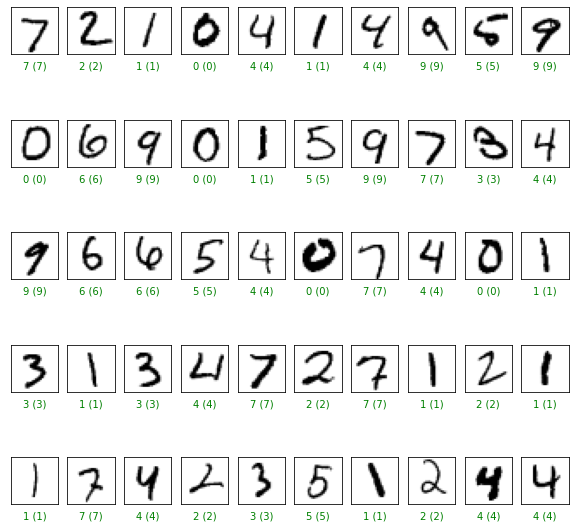

In [37]:
#Plot 50 test images, their predicted label, and the true label
#Color correct predictions in green, incorrect predictions in red
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], class_names[true_label]), color=color)

In [32]:
#grab an image from the test dataset
img_grab = rn.randint(0, len(test_images))
img = test_images[img_grab]

print(img.shape)

(28, 28)


In [33]:
#add image too a batch where it is the only member
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [34]:
prediction = predictions[0]

np.argmax(prediction)

7